# KMeans

## Imports

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

## Mudança do default do matplotlib

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)
for spine in ['top', 'right']:
    plt.rcParams[f'axes.spines.{spine}'] = False

## Criação da base de dados

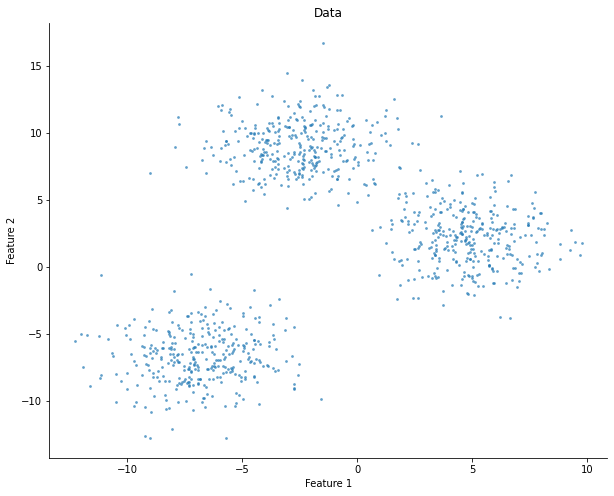

In [3]:
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=3,
                  cluster_std=2,
                  random_state=42)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7)
ax.set_title("Data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2");

## Análise de silhueta para diferentes K clusters

In [4]:
def silhouette_analysis(n_clusters: int = 8):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(14, 8)

    y_lower = 10
    for i in range(n_clusters):
            cluster_silhouette_values_i = sample_silhouette_values[cluster_labels == i]
            cluster_silhouette_values_i.sort()

            size_cluster_i = cluster_silhouette_values_i.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            axes[0].fill_betweenx(np.arange(y_lower, y_upper),
                                  0, cluster_silhouette_values_i,
                                  facecolor=color, edgecolor=color, alpha=0.7)

            axes[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

    axes[0].set_title("Silhuetas")
    axes[0].set_xlabel("Coeficiente de silhueta")
    axes[0].set_ylabel("Label")

    axes[0].axvline(x=silhouette_avg, color="red", linestyle="--")

    axes[0].set_yticks([])
    axes[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    axes[1].scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


    centers = kmeans.cluster_centers_

    axes[1].scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="yellow", s=200, edgecolor='k')

    for i, c in enumerate(centers):
        axes[1].scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

    axes[1].set_title("Visualização dos clusters")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")

    plt.suptitle(f"Análise de silhueta para  {n_clusters} clusters", fontsize=14, fontweight='bold');
    
    return kmeans

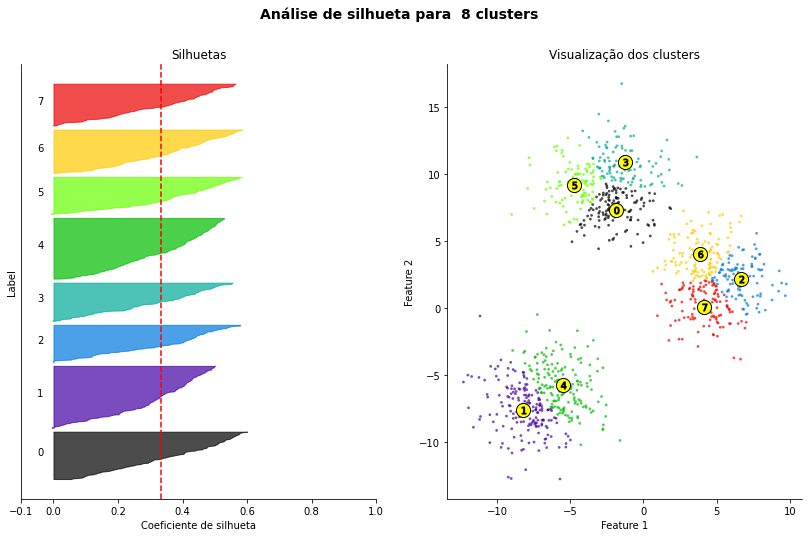

In [5]:
kmeans = silhouette_analysis()

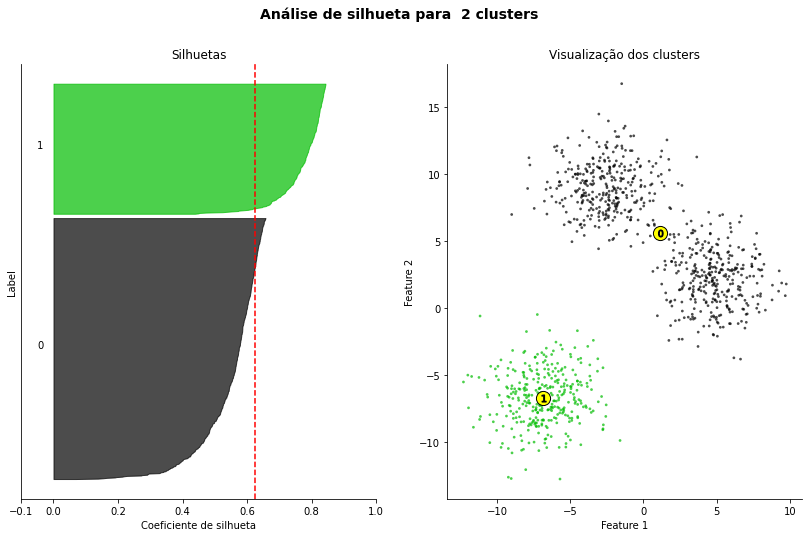

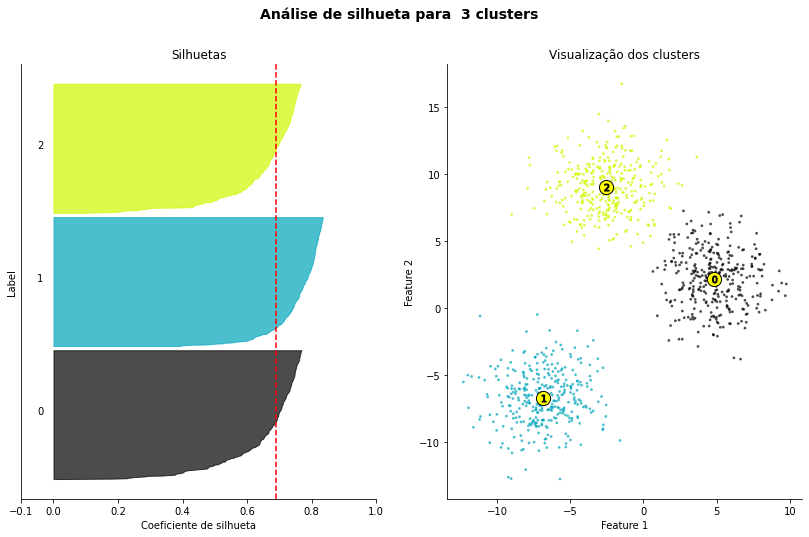

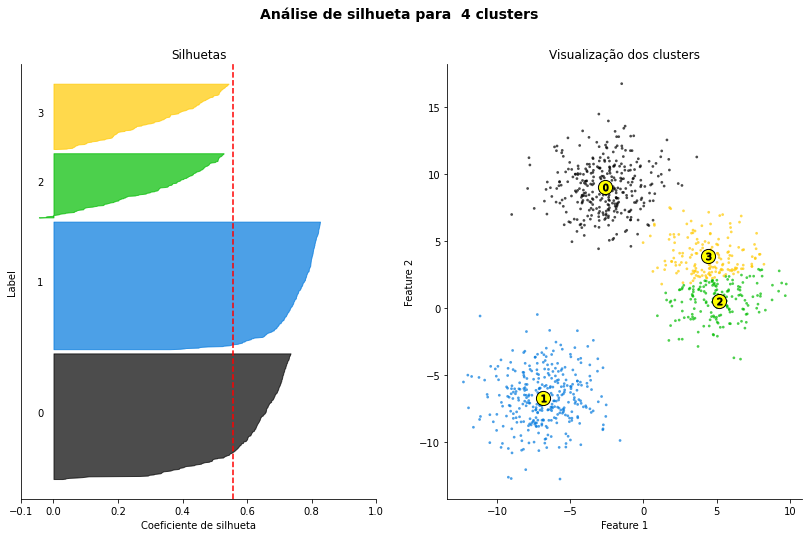

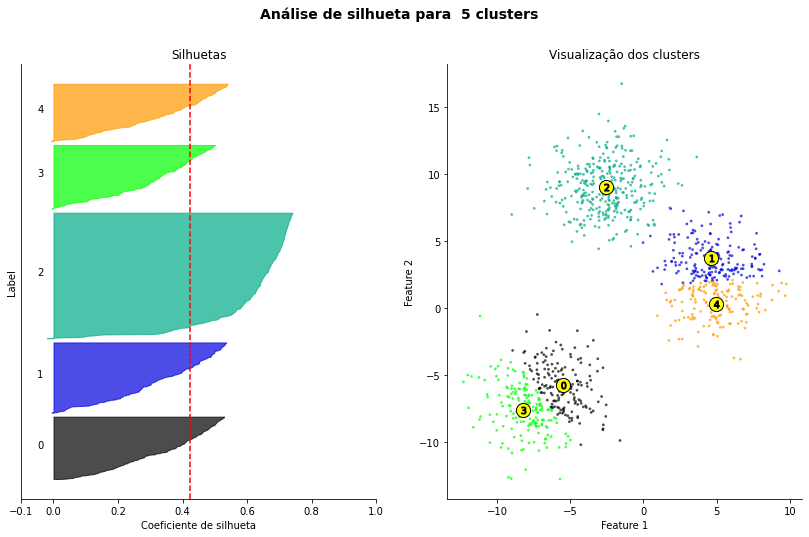

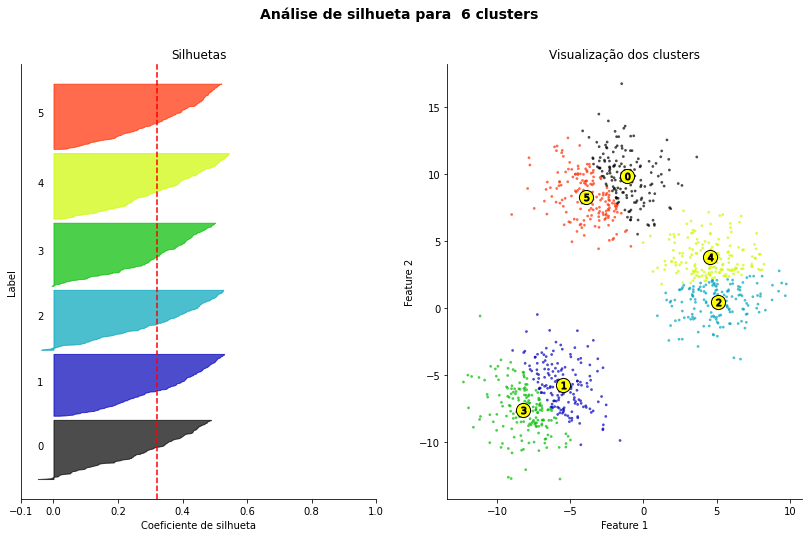

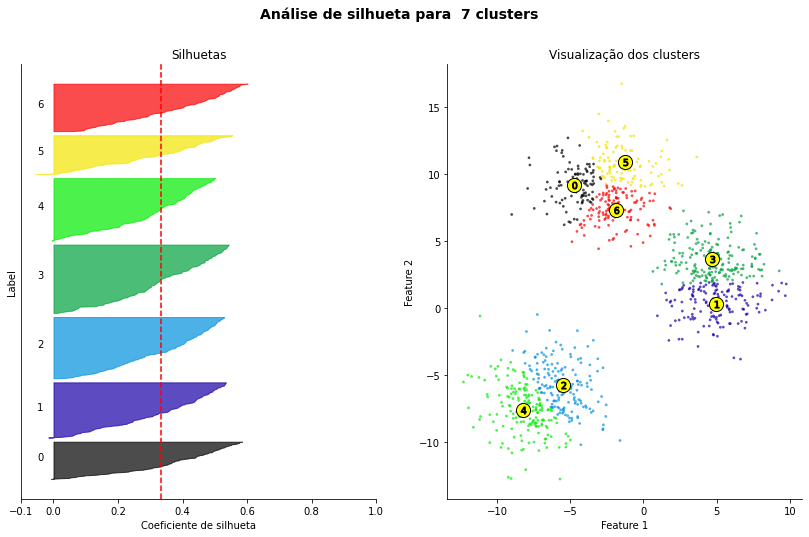

In [6]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    silhouette_analysis(n_clusters)

## Análise dos centros

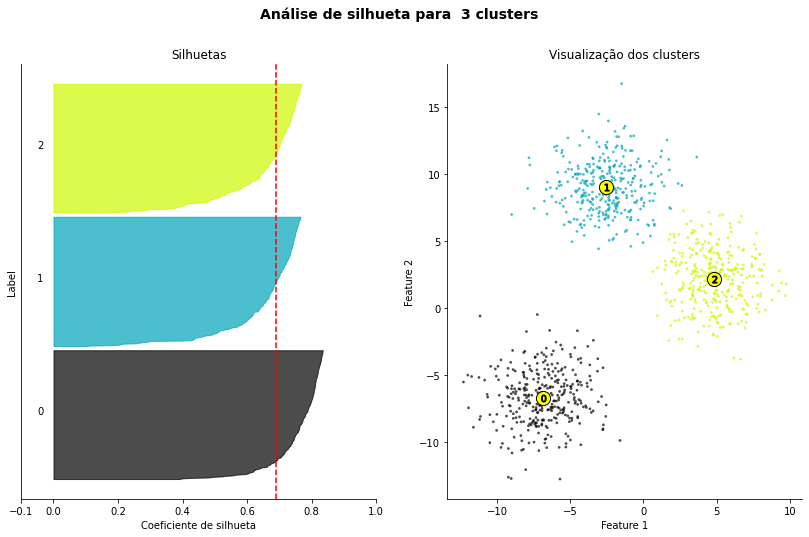

In [7]:
kmeans = silhouette_analysis(n_clusters=3)

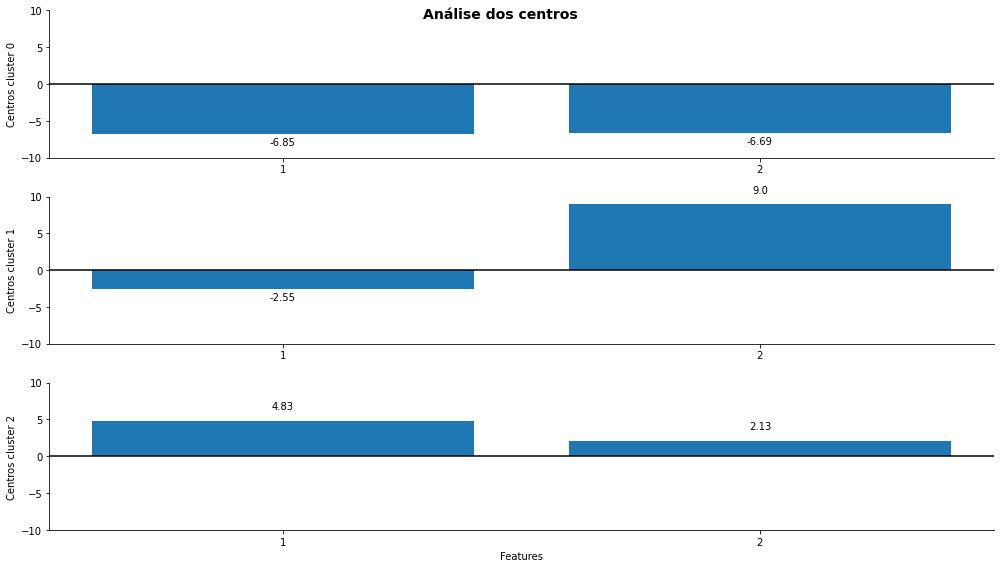

In [8]:
centers = kmeans.cluster_centers_
fig, axes = plt.subplots(3, 1)
axes = axes.ravel()
fig.set_size_inches(14, 8)
for i, (cy, cx) in enumerate(centers):
    axes[i].bar(height=[cy, cx], x=[1, 2])
    axes[i].axhline(y=0, color='black', linestyle='-')
    axes[i].text(1, cy + np.copysign(1.5, cy), str(np.round(cy, 2)), ha='center')
    axes[i].text(2, cx + np.copysign(1.5, cx), str(np.round(cx, 2)), ha='center')
    axes[i].set_ylim([-10, 10])
    axes[i].set_xticks([1, 2])
    axes[i].set_ylabel(f"Centros cluster {i}")
axes[i].set_xlabel("Features")
plt.tight_layout()
plt.suptitle(f"Análise dos centros", fontsize=14, fontweight='bold');